# Bank Churn Prediction

### Bank Churn Prediction Objective:

Given a Bank customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 months.

### Data Description:

The case study is from an open-source dataset from Kaggle.

The dataset contains 10,000 sample points with 14 distinct features such as Customer Id, CreditScore, Geography, Gender, Age, Tenure, Balance etc.

Link to the Kaggle project site: https://www.kaggle.com/barelydedicated/bank-customer-churn-modelingPoints



<h3><b>Distribution: The points distribution for this case is as follows:</b></h3>
    <p>
    <ul style="list-style-type:disc">
        <li>1.Read the dataset   (check)</li>
        <li>2.Drop the columns which are unique for all users like IDs (5 points - check)</li>
        <li>3.Distinguish the features and target variable(5 points - check)</li>
        <li>4.Divide the data set into training and test sets (5 points - check)</li>
        <li>5.Normalize the train and test data (10 points - check)</li>
        <li>6.Initialize & build the model. Identify the points of improvement and implement the same thesame.(20 points - check)</li>
        <li>7.Predict the results using 0.5 as a threshold (10 points)</li>
        <li>8.Print the Accuracy score and confusion matrix (5 points - check)</li>
    </ul>
    </p>


##### (This section was for personal documentation in order to make TensorFlow-Keras to run in my machine.)
### Dokumentation zur Systemkonfiguration:

Beginnen Sie mit der rechten Maustaste auf Start. (Wählen Sie als Administrator die Command Prompt aus.)
Führen Sie den folgenden Befehl aus:

    C:\ProgramData\Anaconda3\Scripts\activate.bat

(Quelle: https://stackoverflow.com/questions/47914980/how-to-access-anaconda-command-prompt-in-windows-10-64-bit)

Wie kann man überprüfen die aktuellen Umgebungen?

    conda info --envs

Wie kann man eine neue Umgebung erstellen?

    conda create --name NAMEN

Schließlich müssen wir die Befehl mit der zu installierenden Sprache und ihrer Version beenden, also: "Python = 3".

Beispiel:

    conda create --name py3-TF2.0 python=3

Überprüfen die Umgebungen mit: conda info --envs

Jetzt müssen wir die Umgebung aktivieren mit conda activate UMG_NAMEN:
Beispiel:

    conda activate py3-TF2.0

Wenn man überprüft mit conda info --envs, man kann eine Stern finden bei die aktiv Umgebung.

Jetzt es ist möglich TensorFlow zu installieren mit:

    conda install tensorflow

So aktualisieren Sie die aktuell installierte TensorFlow-Version Der richtige Befehl lautet:

    pip install –upgrade tensorflow

Sehr empfehlenswert!!!!

Die folgende ist von die Webseite, ich habe direkt von meine neue Umgebung gemacht und es hat funkioniert. Habe noch probiert zur Basis Umgebung zurückgekehrt und installiert, und hat nicht funkioniert. (Jetzt müssen wir zur Basis Umgebung zurückzukehren, und die aktuelle Umgebung deaktivieren, deshalb wir schreiben: 

    conda disable py3-TF2.0

Schließlich müssen wir sicherstellen, dass wir den neue Kernel in Jupyter sehen, sobald wir ihn starten Jupyter. Es gibt verschiedene Möglichkeiten, dies zu tun. Am einfachsten ist es jedoch, zu Ihrer Basis-Umgebung zurückzukehren und zwei Pakete zu installieren: "nb_conda_kernels" und "ipykernel".

Zu installieren ‘ipykernel’, bitte schreiben:

    pip install ipykernel
    
Zu installieren ‘nb_conda_kernels’, bitte schreiben:

    pip install nb_conda_kernels

Das soll reichen die neue Kernel in Jupyter zu finden. (Noch mal, ich habe diese Schrit direkt von meine neue Umgebung gemacht.)

Quelle: https://365datascience.com/install-tensorflow-2-anaconda/

Man kann jetzt Jupyter öffnen, und auf Kernel -> Kernel wechseln, die neue Kernel finden und wähllen.

Super!!! Es ist schon da!! Schön!

Jetzt es ist nötig alle andere Pakete installieren. Anders man bekommnt eine Notiz wie die folgende:

ModuleNotFoundError: No module named 'pandas'

    conda install pandas
    conda install numpy
    conda install matplotlib
    conda install seaborn
    conda install scipy
    conda install scikit-learn

Eine Umgebung zu löschen. conda env remove -n UMG_NAMEN Achtung! Sei vorsichtig!!!

Beispiel:

    conda env remove -n Python3-TF2.0

Quelle: https://stackoverflow.com/questions/49127834/removing-conda-environment#49128056


If you’re used to using the “Run” box to open apps, you can use that to launch Command Prompt with admin privileges. Press Windows+R to open the “Run” box. Type “cmd” into the box and then press Ctrl+Shift+Enter to run the command as an administrator.

https://www.howtogeek.com/194041/how-to-open-the-command-prompt-as-administrator-in-windows-8.1/


In [1]:
# nötig
print(tf.__version__)

2.1.0


In [2]:
# nötig
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Using Tensorflow Keras instead of the original Keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers


In [3]:
# nötig
dfChBank = pd.read_csv("datasets_17473_22922_Churn_Modelling.csv")

In [4]:
dfChBank.shape

(10000, 14)

In [5]:
dfChBank.head();

In [6]:
dfChBank.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
dfChBank.dtypes;

In [8]:
dfChBank.isnull().values.any()

False

In [9]:
# for col in dfChBank:
#    print(col," = ",dfChBank[col].unique())

<h3 style="color:green;">The Row Number, Customer ID and Surname columns are dropped, as they unique for all users and are useless.</h3>

In [10]:
# nötig
dfChBank = dfChBank.drop("RowNumber", axis=1)
dfChBank = dfChBank.drop("CustomerId", axis=1)
dfChBank = dfChBank.drop("Surname", axis=1)

In [11]:
dfChBank;

In [12]:
# for col in dfChBank:
#     print(col," = ",dfChBank[col].unique())

In [13]:
# nötig
dfChBank['Geography'] = dfChBank['Geography'].replace({1: 'France', 2: 'Spain', 3: 'Germany'})

In [14]:
# nötig
dfChBank = pd.get_dummies(dfChBank, columns=['Geography'])
# dfChBank.head()
dfChBank;

In [15]:
# nötig
dfChBank['Gender'] = dfChBank['Gender'].replace({1: 'Male', 2: 'Female'})

In [16]:
# nötig
dfChBank = pd.get_dummies(dfChBank, columns=['Gender'])
# dfChBank.head()
dfChBank;

In [17]:
dfChBank;

In [18]:
dfChBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [19]:
dfChBank.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
dtype: object

In [20]:
dfChBank.isnull().values.any()

False

In [21]:
for col in dfChBank:
    print(col," = ",dfChBank[col].unique())

CreditScore  =  [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 70

In [22]:
dfChBank

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [23]:
# dfChBank_attr = dfChBank.iloc[:, 0:7]
# sns.pairplot(dfChBank_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

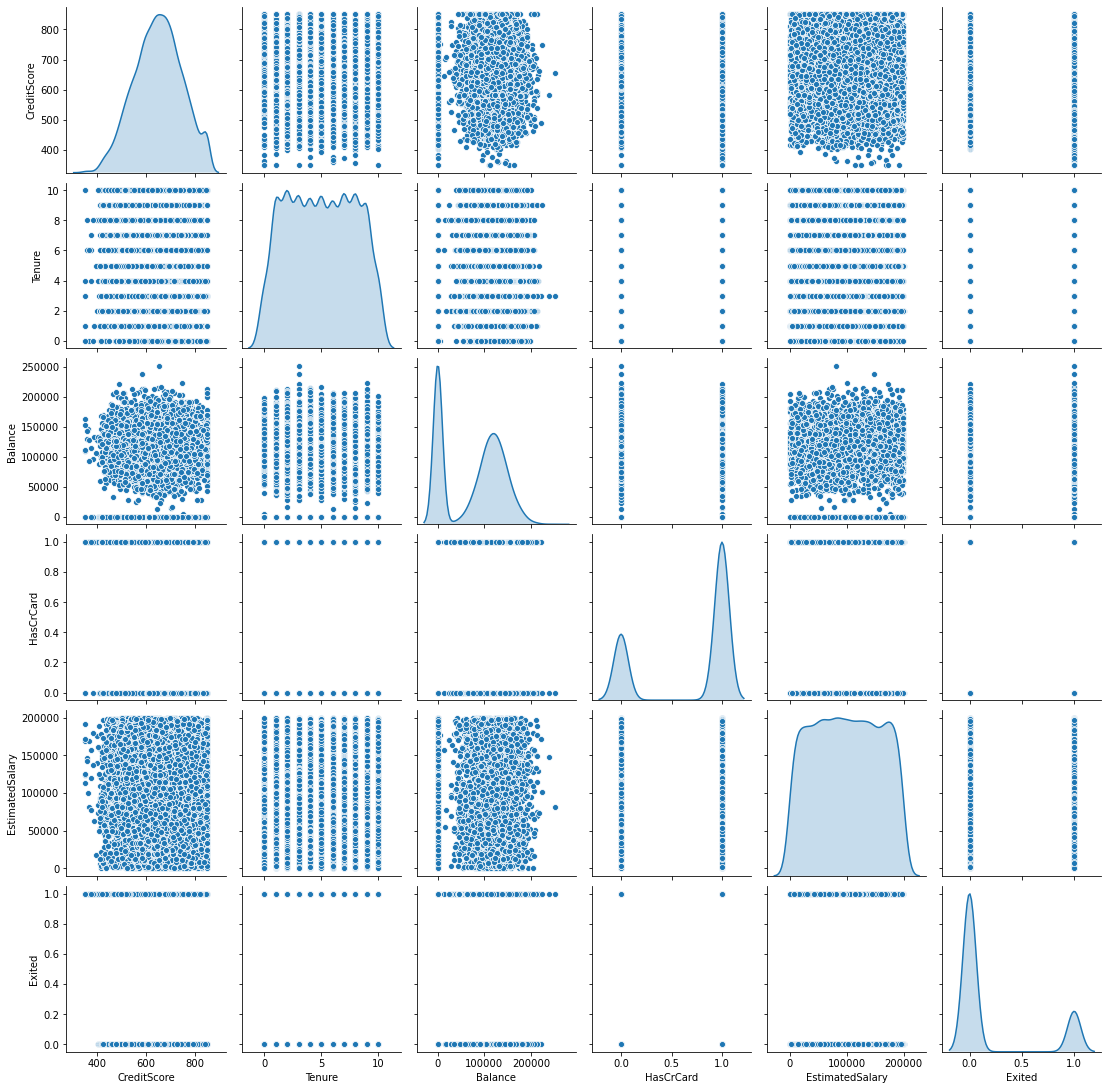

In [24]:
sns.pairplot(dfChBank[['CreditScore', 'Tenure', 'Balance', 'HasCrCard', 'EstimatedSalary', "Exited"]], diag_kind = 'kde');

<h3 style="color:green;">Once the variables (columns) simply related to the individual, like Customer ID, Surname, etc., have been dropped. The target variable (column) is identified as the Exited column.</h3>

<h3 style="color:green;">The target is to find the weights and biases that perform the classification of new data (test data) using information of an almost 'perfect' classification done during training (by minimising an error function).</h3>

In [25]:
dfChBank.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [26]:
# nötig
# Specify the data 
X=dfChBank.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13]]

# Specify the target labels and flatten array
y= dfChBank.iloc[:,8]

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# y_train =  np.array(y_train)
# y_test =  np.array(y_test)

In [27]:
# nötig
X_train = preprocessing.normalize(X_train)

In [28]:
# nötig
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 13)
(3000, 13)
(7000,)
(3000,)


In [29]:
# nötig
# Initialize the constructor
model = Sequential()

# Define model architecture
model.add(Dense(20, input_shape = (13,), activation = 'sigmoid'))
# model.add(Dense(14, activation ='relu'))
model.add(Dense(2,activation='sigmoid'))


In [30]:
# nötig
stchGrDeInfNorm = optimizers.Adam(lr = .5)

In [31]:
# nötig
model.compile(loss='sparse_categorical_crossentropy',optimizer=stchGrDeInfNorm,metrics=['accuracy'])
# model.compile(loss='sparse_categorical_crossentropy',optimizer=stchGrDeInfNorm,metrics=[precision_threshold(0.1)])

In [32]:
# nötig
model.fit(X_train, y_train, epochs=15, batch_size=500, verbose=1) 

Train on 7000 samples
Epoch 1/15
7000/7000 [==============================] - 1s 149us/sample - loss: 0.6355 - accuracy: 0.7476
Epoch 2/15
7000/7000 [==============================] - 0s 11us/sample - loss: 0.5163 - accuracy: 0.7924
Epoch 3/15
7000/7000 [==============================] - 0s 12us/sample - loss: 0.5126 - accuracy: 0.7924
Epoch 4/15
7000/7000 [==============================] - 0s 11us/sample - loss: 0.5093 - accuracy: 0.7924
Epoch 5/15
7000/7000 [==============================] - 0s 13us/sample - loss: 0.5042 - accuracy: 0.7924
Epoch 6/15
7000/7000 [==============================] - 0s 10us/sample - loss: 0.5034 - accuracy: 0.7924
Epoch 7/15
7000/7000 [==============================] - 0s 11us/sample - loss: 0.5026 - accuracy: 0.7924
Epoch 8/15
7000/7000 [==============================] - 0s 9us/sample - loss: 0.5050 - accuracy: 0.7924
Epoch 9/15
7000/7000 [==============================] - 0s 8us/sample - loss: 0.5038 - accuracy: 0.7924
Epoch 10/15
7000/7000 [===========

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                280       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 42        
Total params: 322
Trainable params: 322
Non-trainable params: 0
_________________________________________________________________


In [34]:
X_test = preprocessing.normalize(X_test)

In [35]:
results = model.evaluate(X_test, y_test.values)

3000/3000 [==============================] - 0s 165us/sample - loss: 0.4878 - accuracy: 0.8053


In [36]:
# nötig
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.805
Loss: 0.488


<h3 style="color:green;">Point 7 Inticates to predict the results using 0.5 as a threshold (10 points)</h3>
<h3 style="color:red;">As it can be seen below, predicting the result with a 0.5 threshold would require to introduce functions similar to the following, then introducing it to the compilation of the model</h3>

In [37]:
# model.compile(loss='sparse_categorical_crossentropy',optimizer=stchGrDeInfNorm,metrics=[precision_threshold(0.5)])

def precision_threshold(threshold=0.5):
    def precision(y_true, y_pred):
        """Precision metric.
        Computes the precision over the whole batch using threshold_value.
        """
        threshold_value = threshold
        # Adaptation of the "round()" used before to get the predictions. Clipping to make sure that the predicted raw values are between 0 and 1.
        y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold_value), K.floatx())
        # Compute the number of true positives. Rounding in prevention to make sure we have an integer.
        true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
        # count the predicted positives
        predicted_positives = K.sum(y_pred)
        # Get the precision ratio
        precision_ratio = true_positives / (predicted_positives + K.epsilon())
        return precision_ratio
    return precision

def recall_threshold(threshold = 0.5):
    def recall(y_true, y_pred):
        """Recall metric.
        Computes the recall over the whole batch using threshold_value.
        """
        threshold_value = threshold
        # Adaptation of the "round()" used before to get the predictions. Clipping to make sure that the predicted raw values are between 0 and 1.
        y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold_value), K.floatx())
        # Compute the number of true positives. Rounding in prevention to make sure we have an integer.
        true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
        # Compute the number of positive targets.
        possible_positives = K.sum(K.clip(y_true, 0, 1))
        recall_ratio = true_positives / (possible_positives + K.epsilon())
        return recall_ratio
    return recall

In [38]:
y_predict = model.predict(X_test)

In [39]:
y_predict[0]

array([0.94641423, 0.3019622 ], dtype=float32)

In [40]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[2416    0]
 [ 584    0]]


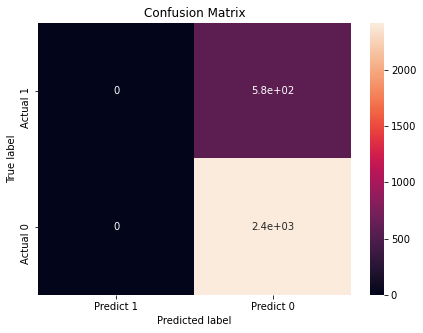

In [41]:
dfConfMatrix = metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

#dfConfMatrix = pd.DataFrame(confMatrix,
#                           index = [i for i in ["Actual 1","Actual 0"]],     # Another alternative way to plot y labels
#                           columns = [i for i in ["Predict 1","Predict 0"]]  # Another alternative way to plot x labels
#                           )
plt.figure(figsize = (7,5))  # This determines the size of the figure, goes always before sns.---
#sns.heatmap(dfConfMatrix, annot=True);   # For the alternative way to print labels.
sns.heatmap(dfConfMatrix, annot=True, xticklabels = ["Predict 1", "Predict 0"] , yticklabels = ["Actual 1", "Actual 0"]);

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');